In [91]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [85]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
    ) / (0.5 + np.abs(np.cos(x)))

In [92]:
N = 10 ** 5
x = np.linspace(-10, 10, N)[:, None]
y = some_complicated_function(x)

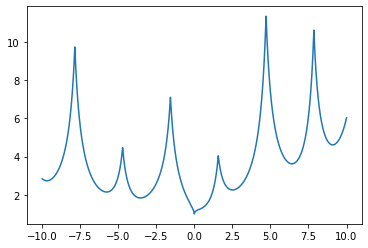

In [88]:
plt.plot(x, y)

In [96]:
model = tf.keras.Sequential(
    layers=[
        tf.keras.Input(shape=(1,)),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

In [97]:
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

In [101]:
model.fit(x, y, epochs=10)

Epoch 1/10
3125/3125 [==============================] - 8s 2ms/step - loss: 0.1462 - mse: 0.1462
Epoch 2/10
3125/3125 [==============================] - 8s 2ms/step - loss: 0.0888 - mse: 0.0888
Epoch 3/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0799 - mse: 0.0799
Epoch 4/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0707 - mse: 0.0707
Epoch 5/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0636 - mse: 0.0636
Epoch 6/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0620 - mse: 0.0620
Epoch 7/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0501 - mse: 0.0501
Epoch 8/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0515 - mse: 0.0515
Epoch 9/10
3125/3125 [==============================] - 8s 2ms/step - loss: 0.0475 - mse: 0.0475
Epoch 10/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0406 - mse: 0.0406


In [102]:
y_pred = model.predict(x)

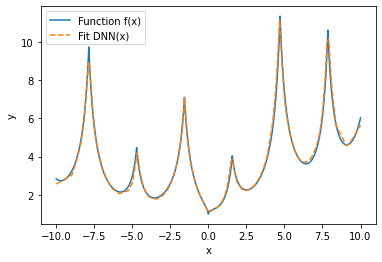

In [108]:
plt.plot(x, y, label="Function f(x)")
plt.plot(x, y_pred, linestyle="--", label="Fit DNN(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("fit.pdf")